In [11]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)
from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


In [12]:
save_dir=f"{exps_dir}/exp2/exp_smote"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [13]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{save_dir}/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

(19430, 33) (19430, 1) (5089, 33) (5089, 1)


{0: 0.5317035512094699, 1: 8.385551948051948}

In [14]:
def oneHot(arr):
    labels = np.array(arr)
    encoder = OneHotEncoder(sparse=False)
    
    labels_reshaped = labels.reshape(-1, 1)
    
    encoder.fit(labels_reshaped)
    
    onehot_labels = encoder.transform(labels_reshaped)
    # onehot_labels=pd.DataFrame(onehot_labels)
    return onehot_labels

# y_train_onehot=oneHot(y_train)
# y_test_onehot=oneHot(y_test)
# print(y_test_onehot.shape,y_train_onehot.shape)


In [15]:
y_train_onehot=pd.DataFrame(oneHot(y_train))
y_test_onehot=pd.DataFrame(oneHot(y_test))
y_train_onehot.to_excel(f'{save_dir}/y_train_onehot.xlsx', index=False)
y_test_onehot.to_excel(f'{save_dir}/y_test_onehot.xlsx', index=False)
print(y_test_onehot.shape,y_train_onehot.shape)

(5089, 2) (19430, 2)


In [16]:
print(y_train_onehot.value_counts())
print(y_test_onehot.value_counts())

0    1  
0.0  1.0    9715
1.0  0.0    9715
Name: count, dtype: int64
0    1  
1.0  0.0    4782
0.0  1.0     307
Name: count, dtype: int64


In [17]:
feature_selection=dict(np.load(f'{save_dir}/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection.keys()

dict_keys(['LR', 'LDA', 'DTC', 'RD', 'LGBM', 'XGB', 'KNC', 'GNB', 'NN', 'BG', 'NB', 'SVM'])

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [18]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 84.637% (0.442%)
Accuracy LDA: 84.452% (0.306%)
Accuracy DTC: 90.437% (0.239%)
Accuracy RD: 94.287% (0.309%)
Accuracy KNC: 85.255% (0.473%)
Accuracy NB: 79.403% (0.690%)
Accuracy SVM: 86.722% (0.569%)
Accuracy NN: 87.802% (0.740%)
Accuracy BG: 87.056% (0.417%)
[LightGBM] [Info] Number of positive: 7712, number of negative: 7832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496140 -> initscore=-0.015440
[LightGBM] [Info] Start training from score -0.015440
[LightGBM] [Info] Number of positive: 7752, number of negative: 7792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds

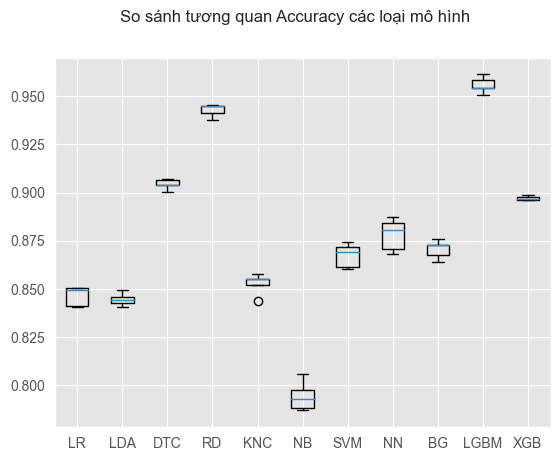

Precision LR: 81.479% (0.509%)
Precision LDA: 80.674% (0.538%)
Precision DTC: 88.866% (0.705%)
Precision RD: 92.558% (0.273%)
Precision KNC: 86.504% (0.545%)
Precision NB: 72.929% (0.855%)
Precision SVM: 83.198% (0.684%)
Precision NN: 84.306% (0.669%)
Precision BG: 84.081% (0.271%)
[LightGBM] [Info] Number of positive: 7712, number of negative: 7832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496140 -> initscore=-0.015440
[LightGBM] [Info] Start training from score -0.015440
[LightGBM] [Info] Number of positive: 7752, number of negative: 7792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overh

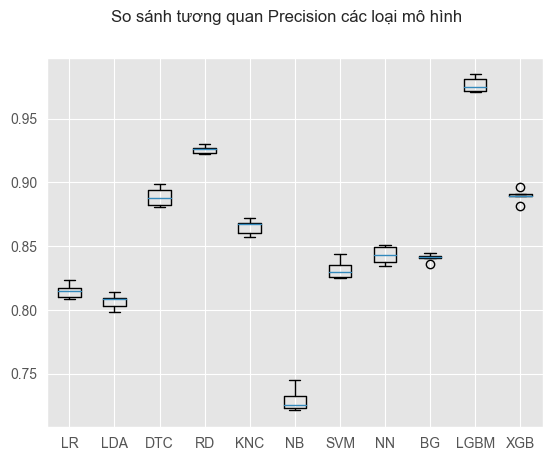

Recall LR: 89.646% (0.656%)
Recall LDA: 90.607% (0.729%)
Recall DTC: 92.455% (0.254%)
Recall RD: 96.311% (0.465%)
Recall KNC: 83.527% (0.801%)
Recall NB: 93.534% (0.467%)
Recall SVM: 92.032% (0.916%)
Recall NN: 92.898% (1.637%)
Recall BG: 91.423% (0.742%)
[LightGBM] [Info] Number of positive: 7712, number of negative: 7832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496140 -> initscore=-0.015440
[LightGBM] [Info] Start training from score -0.015440
[LightGBM] [Info] Number of positive: 7752, number of negative: 7792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

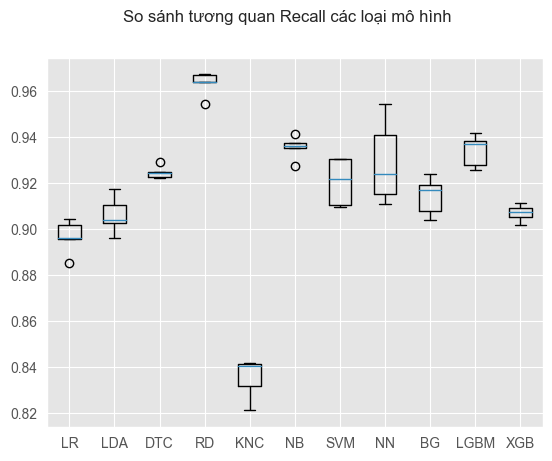

F1 LR: 85.366% (0.447%)
F1 LDA: 85.349% (0.330%)
F1 DTC: 90.623% (0.297%)
F1 RD: 94.397% (0.348%)
F1 KNC: 84.988% (0.617%)
F1 NB: 81.952% (0.502%)
F1 SVM: 87.388% (0.535%)
F1 NN: 88.385% (0.794%)
F1 BG: 87.597% (0.331%)
[LightGBM] [Info] Number of positive: 7712, number of negative: 7832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496140 -> initscore=-0.015440
[LightGBM] [Info] Start training from score -0.015440
[LightGBM] [Info] Number of positive: 7752, number of negative: 7792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number 

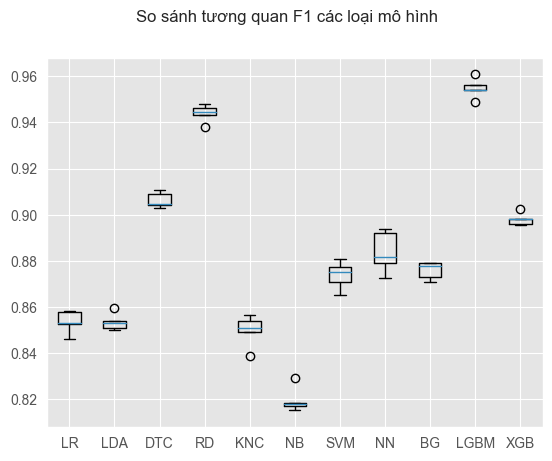

In [19]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR', LogisticRegression(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('LDA', LinearDiscriminantAnalysis(), x_train, y_train, names, results, scoring)
    check_model('DTC', DecisionTreeClassifier(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('RD', RandomForestClassifier(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('KNC', KNeighborsClassifier(), x_train, y_train, names, results, scoring)
    check_model('NB', GaussianNB(), x_train, y_train, names, results, scoring)
    check_model('SVM', SVC(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('NN', MLPClassifier(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('BG', GradientBoostingClassifier(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('LGBM', LGBMClassifier(random_state=seed), x_train, y_train, names, results, scoring)
    check_model('XGB', XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss'), x_train, y_train, names, results, scoring)
    
    # Vẽ biểu đồ
    fig = plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
    results = []
    names = []
    # fig=plt.figure()
    # fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    # ax=fig.add_subplot(111)
    # plt.boxplot(results)
    # ax.set_xticklabels(names)
    # plt.show()
    # results=[]
    # names=[]


In [20]:
# for scoring in scorings:
#     check_model('LR', LogisticRegression(class_weight=class_weights_dict, random_state=seed), x_test, y_test, names, results, scoring)
#     check_model('LDA', LinearDiscriminantAnalysis(), x_test, y_test, names, results, scoring)
#     check_model('DTC', DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4, class_weight=class_weights_dict, random_state=seed), x_test, y_test, names, results, scoring)
#     check_model('RD', RandomForestClassifier(n_estimators=100, random_state=seed, class_weight=class_weights_dict), x_test, y_test, names, results, scoring)
#     check_model('KNC', KNeighborsClassifier(n_neighbors=100), x_test, y_test, names, results, scoring)
#     check_model('NB', GaussianNB(), x_test, y_test, names, results, scoring)
#     check_model('SVM', SVC(kernel='rbf', gamma='scale' ,class_weight=class_weights_dict, random_state=seed), x_test, y_test, names, results, scoring)
#     check_model('NN', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed), x_test, y_test, names, results, scoring)
#     check_model('BG', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed), x_test, y_test, names, results, scoring)
#     fig=plt.figure()
#     fig.suptitle(f'{scoring.title()} of experiment models')
#     ax=fig.add_subplot(111)
#     plt.boxplot(results)
#     ax.set_xticklabels(names)
#     # plt.savefig(f'So sánh tương quan {scoring.title()} các loại mô hình.png')
#     plt.show()
#     results=[]
#     names=[]

In [21]:
names = [
    'LR',
    'LDA',
    'DTC',
    'RD',
    'KNC',
    'NB',
    'SVM',
    'NN',
    'BG',
    'LGBM',  # Thêm mô hình LightGBM
    'XGB'    # Thêm mô hình XGBoost
]

[LightGBM] [Info] Number of positive: 9715, number of negative: 9715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 19430, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


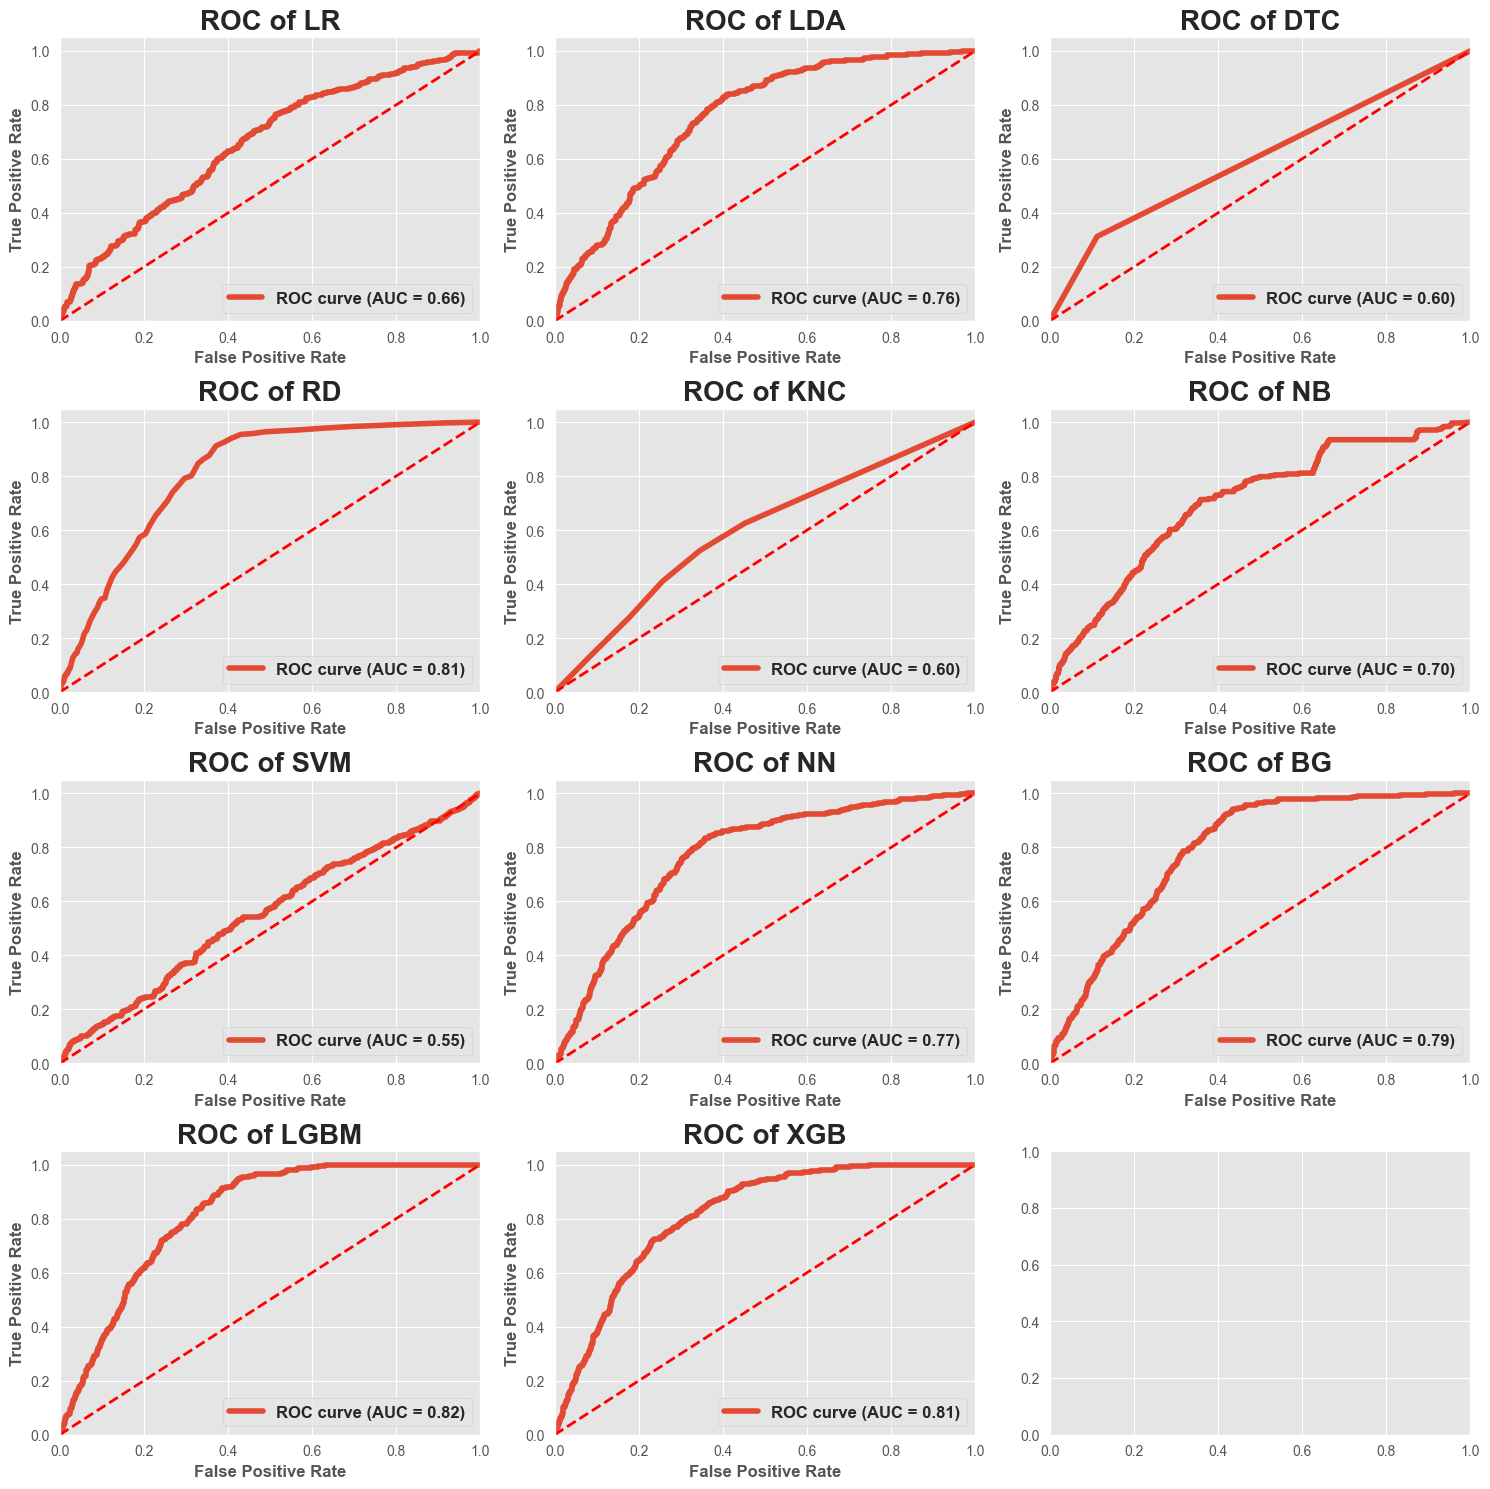

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, name, X_test, y_test, ax):
    model.fit(x_train,y_train)
    try:
        # Huấn luyện mô hình trên dữ liệu huấn luyện
        y_scores = model.predict_proba(X_test)[:,1]
    except:
        y_scores = model.decision_function(X_test)
    
    # Tính toán FPR và TPR từ decision function
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    
    # Tính diện tích dưới đường cong ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
    ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
    ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
    ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích
        

# Tạo một lưới đồ thị 3x3
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
models = [
    LogisticRegression(random_state=seed),
    LinearDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed, ),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(random_state=seed),
    MLPClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=42),
    LGBMClassifier(random_state=seed),  # Mô hình LightGBM
    XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')  # Mô hình XGBoost
]# Lặp qua từng mô hình và vẽ đường cong ROC
for i, model in enumerate(models):
    name=names[i]
    row = i // 3
    col = i % 3
    plot_roc_curve(model,name , x_test, y_test, ax=axes[row, col])

# Cân chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def train_model(best_model, x_train, y_train, features):
    x = x_train[features]
    for train_index, _ in kfold.split(x):
        X_train_fold, y_train_fold = x_train.iloc[train_index][features], y_train.iloc[train_index]
        
        # Huấn luyện mô hình tốt nhất trên fold hiện tại
        best_model.fit(X_train_fold, y_train_fold)
    return best_model


In [24]:
print(class_weights_dict)
n_classes = y_train_onehot.shape[1]
class_weights_dict = {i: class_weights_dict[i] for i in range(len(class_weights_dict))}
class_weights_onehot = np.eye(n_classes)
for i, weight in class_weights_dict.items():
    class_weights_onehot[i] *= weight

print("Trọng số dưới dạng one-hot encoding:\n", class_weights_onehot)

{0: 0.5317035512094699, 1: 8.385551948051948}
Trọng số dưới dạng one-hot encoding:
 [[0.53170355 0.        ]
 [0.         8.38555195]]


In [25]:
class_weights_dict1 = {i: class_weights_onehot[i].tolist() for i in range(len(class_weights_onehot))}
class_weights_dict1

{0: [0.5317035512094699, 0.0], 1: [0.0, 8.385551948051948]}

In [26]:
n_classes = y_train_onehot.shape[1]

# Tạo danh sách từ điển cho class_weight
class_weights_list = [{i: class_weights_dict[i]} for i in range(n_classes)]

In [27]:
class_weights_list

[{0: 0.5317035512094699}, {1: 8.385551948051948}]

#### Build and evaluate model

In [28]:
from sklearn.multioutput import MultiOutputClassifier


In [29]:
best_model1 = train_model(RandomForestClassifier(n_estimators=100, random_state=seed, class_weight=class_weights_dict),x_train=x_train,y_train=y_train,features=feature_selection['RD'])
best_model2=train_model(LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=seed),x_train=x_train,y_train=y_train,features=feature_selection['LGBM'])
best_model3=train_model(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed, use_label_encoder=False, eval_metric='mlogloss'),x_train=x_train,y_train=y_train,features=feature_selection['XGB'])


[LightGBM] [Info] Number of positive: 7785, number of negative: 7759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500836 -> initscore=0.003345
[LightGBM] [Info] Start training from score 0.003345
[LightGBM] [Info] Number of positive: 7792, number of negative: 7752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 15544, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501287 -> initscore=0.005147
[LightGBM] [Info] Start training from score 0.005147
[LightGBM] [Info] Numb

In [30]:
evaluate_result={}

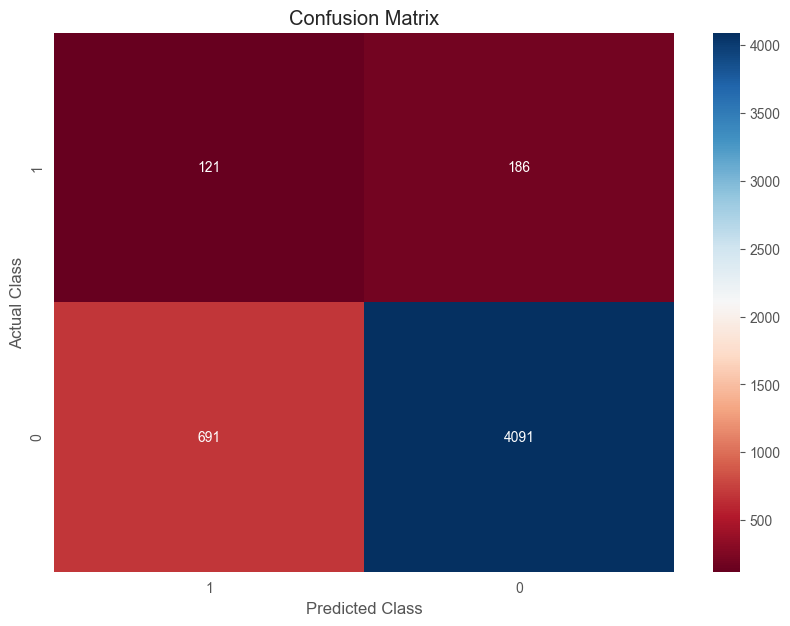

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      4782
           1       0.15      0.39      0.22       307

    accuracy                           0.83      5089
   macro avg       0.55      0.62      0.56      5089
weighted avg       0.91      0.83      0.86      5089



In [31]:
predictions = best_model1.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

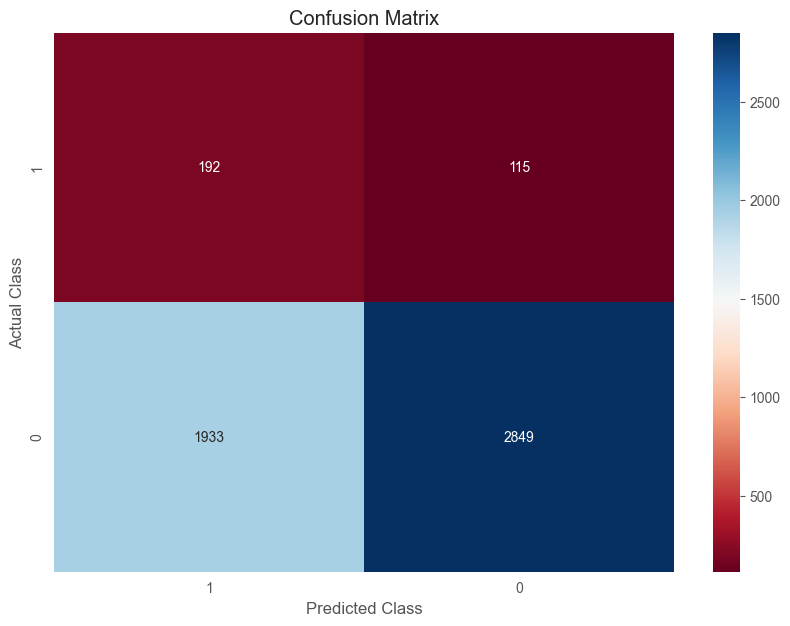

              precision    recall  f1-score   support

           0       0.96      0.60      0.74      4782
           1       0.09      0.63      0.16       307

    accuracy                           0.60      5089
   macro avg       0.53      0.61      0.45      5089
weighted avg       0.91      0.60      0.70      5089



In [32]:
predictions = best_model2.predict(x_test[feature_selection['LGBM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LGBM']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

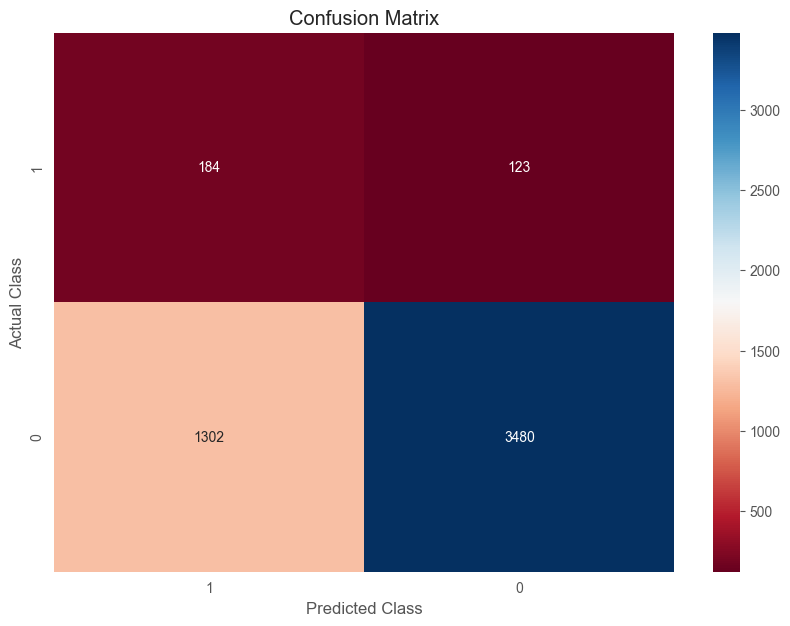

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      4782
           1       0.12      0.60      0.21       307

    accuracy                           0.72      5089
   macro avg       0.54      0.66      0.52      5089
weighted avg       0.92      0.72      0.79      5089



In [33]:
predictions = best_model3.predict(x_test[feature_selection['XGB']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['XGB']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

#### Tuning Hyparameter

In [34]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

RD
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      4782
           1       0.15      0.39      0.22       307

    accuracy                           0.83      5089
   macro avg       0.55      0.62      0.56      5089
weighted avg       0.91      0.83      0.86      5089

LGBM
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      4782
           1       0.09      0.63      0.16       307

    accuracy                           0.60      5089
   macro avg       0.53      0.61      0.45      5089
weighted avg       0.91      0.60      0.70      5089

XGB
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      4782
           1       0.12      0.60      0.21       307

    accuracy                           0.72      5089
   macro avg       0.54      0.66      0.52      5089
weighted avg       0.92      0.72      0.79      5089



In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search_rf  = GridSearchCV(estimator=RandomForestClassifier(class_weight= 'balanced', random_state=seed),
                              param_grid=param_grid_rf,
                              scoring='f1',
                              cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train[feature_selection['RD']], y_train)
rf_model = grid_search_rf.best_estimator_

dump(rf_model, f'{save_dir}/rf_model.joblib')

print("Best Random Forest Hyperparameters:")
print(grid_search_rf.best_params_)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


KeyboardInterrupt: 

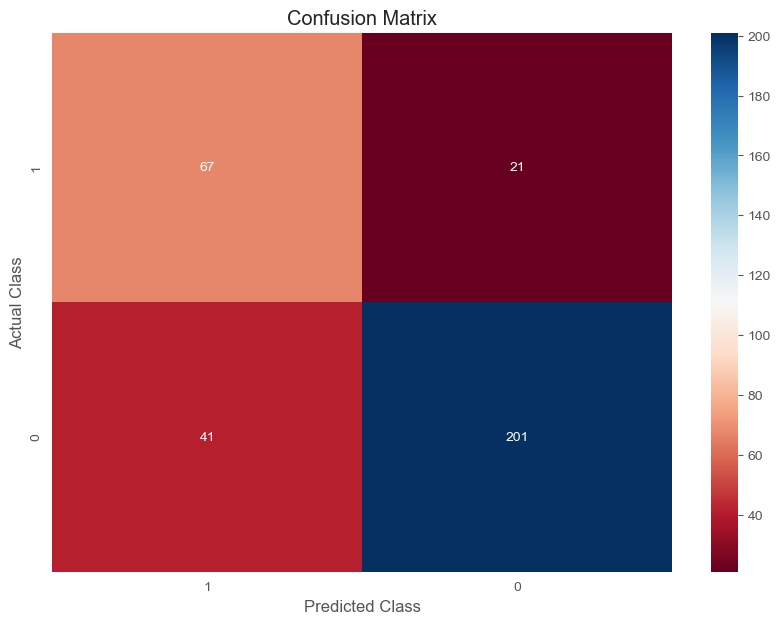

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       242
           1       0.62      0.76      0.68        88

    accuracy                           0.81       330
   macro avg       0.76      0.80      0.78       330
weighted avg       0.83      0.81      0.82       330



In [ ]:
predictions = rf_model.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 3, 5],
    'subsample': [0.8, 1.0], 
    'min_child_samples': [10, 20, 30],  
    'colsample_bytree': [0.8, 1.0]     
}

grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42),
                                param_grid=param_grid,
                                scoring='f1',
                                cv=5, n_jobs=-1, verbose=2)

grid_search_lgbm.fit(x_train[feature_selection['LGBM']], y_train)

lgbm_model = grid_search_lgbm.best_estimator_
dump(lgbm_model, f'{save_dir}/lgbm_model.joblib')

print("Best LGBM Hyperparameters:")
print(grid_search_lgbm.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 159, number of negative: 511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237313 -> initscore=-1.167465
[LightGBM] [Info] Start training from score -1.167465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

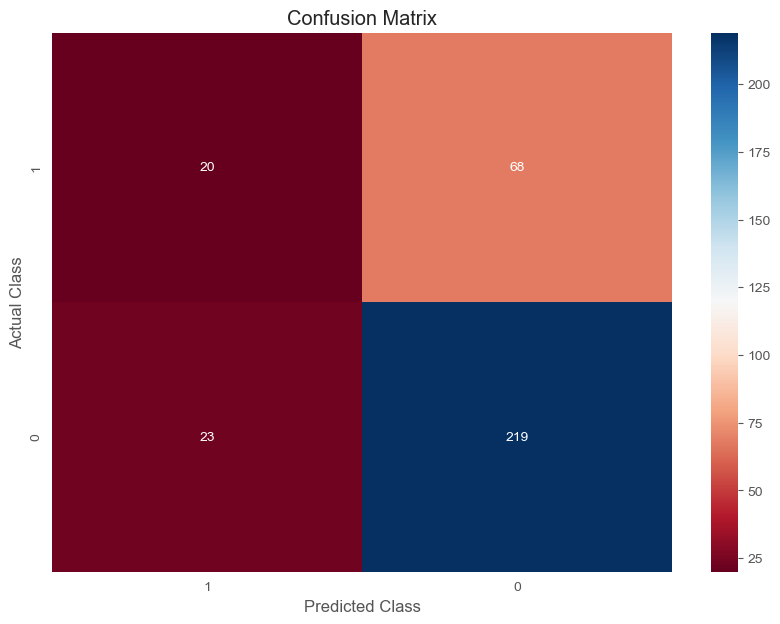

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       242
           1       0.47      0.23      0.31        88

    accuracy                           0.72       330
   macro avg       0.61      0.57      0.57       330
weighted avg       0.68      0.72      0.69       330



In [ ]:
predictions = lgbm_model.predict(x_test[feature_selection['LGBM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LGBM']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss'),
                               param_grid=param_grid_xgb,
                               scoring='f1',
                               cv=5, n_jobs=-1, verbose=2)

grid_search_xgb.fit(x_train[feature_selection['XGB']], y_train)

xgb_model = grid_search_xgb.best_estimator_
dump(xgb_model, f'{save_dir}/xgb_model.joblib')

print("Best XGBoost Hyperparameters:")
print(grid_search_xgb.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost Hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


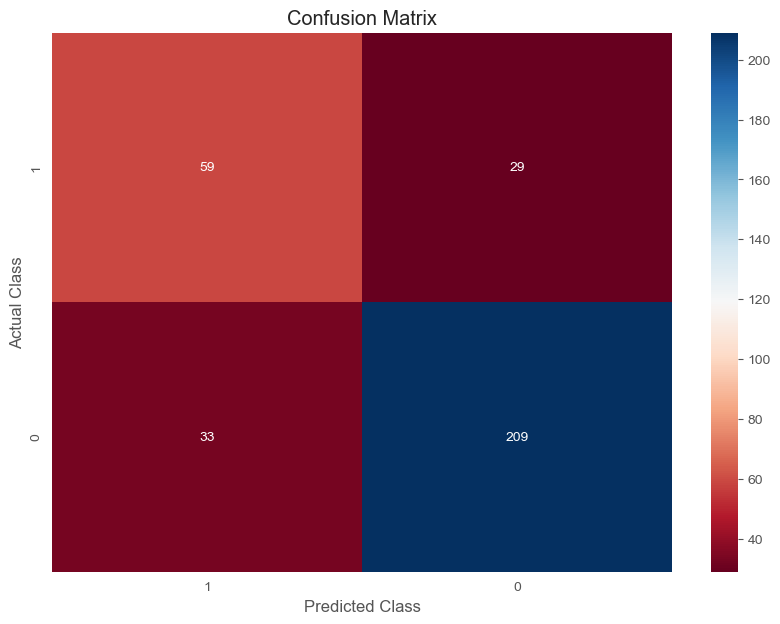

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       242
           1       0.64      0.67      0.66        88

    accuracy                           0.81       330
   macro avg       0.76      0.77      0.76       330
weighted avg       0.81      0.81      0.81       330



In [ ]:
predictions = xgb_model.predict(x_test[feature_selection['XGB']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['XGB']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [ ]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [ ]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [ ]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,best_model1, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: N
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: Y
Predicted: Y
----------------------------
Lần thứ 4: 
True: N
Predicted: Y
----------------------------
Lần thứ 5: 
True: N
Predicted: N
----------------------------
Lần thứ 6: 
True: Y
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: N
----------------------------
Lần thứ 10: 
True: Y
Predicted: Y
----------------------------


In [ ]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 8 chiếm khoảng 80.0% tổng lần dự đoán


In [ ]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = best_model1.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
